In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *
from scipy.stats import norm, lognorm, expon, exponweib, probplot, kstest
sns.set(color_codes=True)
%matplotlib inline

In [3]:
datapath = r"C:\Users\Bernardo\Desktop\19.2\Probest\Dados-medicos.csv"
data_df = pd.read_csv(datapath, skiprows=1, sep='\s+', names=['Idade','Peso','Carga Final','VO2 Max'])

In [4]:
data = np.array(data_df)
idade = data[:,0]
peso = data[:,1]
cargafinal = data[:,2]
vo2max = data[:,3]

In [5]:
#Slide aula_12_2.pdf
def tamanhoBin (n, s):
    return 3.49*s*pow(n,-1/3)

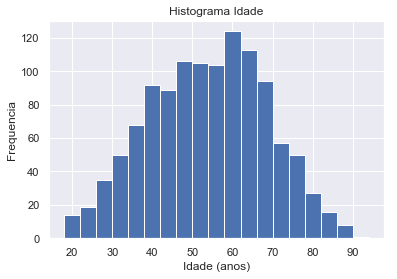

In [6]:
#Idade
b = tamanhoBin(idade.size, np.std(idade))
fig = plt.figure()
plt.hist(idade, bins=range(int(min(idade)), int(max(idade)) + int(b), int(b)))
plt.xlabel('Idade (anos)')
plt.ylabel('Frequencia')
plt.title('Histograma Idade')
fig.savefig('histIdade.png', dpi=fig.dpi)

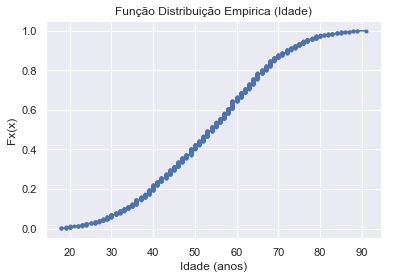

In [7]:
y = np.arange(1, len(idade)+1)/len(idade)
idade = np.sort(idade)
fig = plt.figure()
plt.plot(idade, y, marker='.')
plt.xlabel('Idade (anos)')
plt.ylabel('Fx(x)')
plt.title('Função Distribuição Empirica (Idade)')
fig.savefig('fdeIdade.png', dpi=fig.dpi)

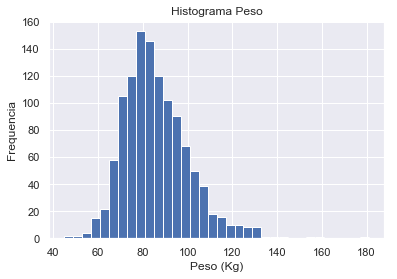

In [8]:
#Peso
b = tamanhoBin(peso.size, np.std(peso))
fig = plt.figure()
plt.hist(peso, bins=range(int(min(peso)), int(max(peso)) + int(b), int(b)))
plt.xlabel('Peso (Kg)')
plt.ylabel('Frequencia')
plt.title('Histograma Peso')
fig.savefig('histPeso.png', dpi=fig.dpi)

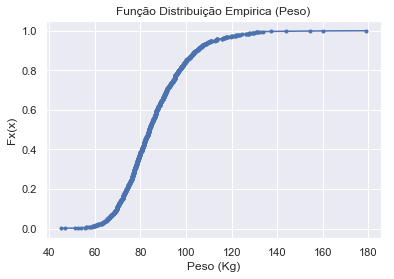

In [9]:
y = np.arange(1, len(peso)+1)/len(peso)
peso = np.sort(peso)
fig = plt.figure()
plt.plot(peso, y, marker='.')
plt.xlabel('Peso (Kg)')
plt.ylabel('Fx(x)')
plt.title('Função Distribuição Empirica (Peso)')
fig.savefig('fdePeso.png', dpi=fig.dpi)

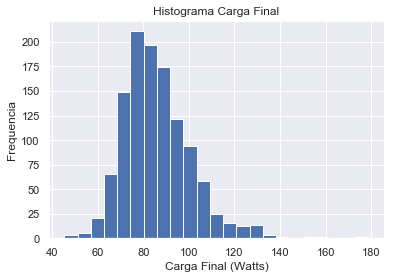

In [10]:
#Carga Final
#Como há um outlier de valor 432, os bins calculados de forma semelhante as outras variáveis fica muito distorcido
b = tamanhoBin(cargafinal.size, np.std(cargafinal))
fig = plt.figure()
plt.hist(peso, bins=int(b))
plt.xlabel('Carga Final (Watts)')
plt.ylabel('Frequencia')
plt.title('Histograma Carga Final')
fig.savefig('histCF.png', dpi=fig.dpi)

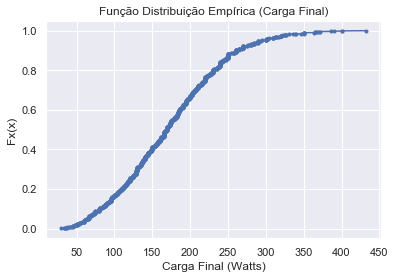

In [11]:
y = np.arange(1, len(cargafinal)+1)/len(cargafinal)
cargafinal = np.sort(cargafinal)
fig = plt.figure()
plt.plot(cargafinal,y,marker='.')
plt.xlabel('Carga Final (Watts)')
plt.ylabel('Fx(x)')
plt.title('Função Distribuição Empírica (Carga Final)')
fig.savefig('fdeCF.png', dpi=fig.dpi)

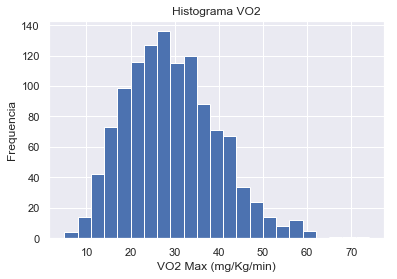

In [12]:
#VO2 Max
b = tamanhoBin(vo2max.size, np.std(vo2max))
fig = plt.figure()
plt.hist(vo2max, bins=range(int(min(vo2max)), int(max(vo2max)) + int(b), int(b)))
plt.xlabel('VO2 Max (mg/Kg/min)')
plt.ylabel('Frequencia')
plt.title('Histograma VO2')
fig.savefig('histVO2.png', dpi=fig.dpi)

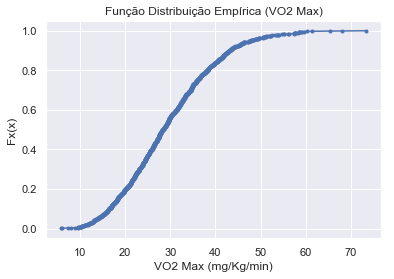

In [13]:
y = np.arange(1, len(vo2max)+1)/len(vo2max)
vo2max = np.sort(vo2max)
fig = plt.figure()
plt.plot(vo2max,y,marker='.')
plt.xlabel('VO2 Max (mg/Kg/min)')
plt.ylabel('Fx(x)')
plt.title('Função Distribuição Empírica (VO2 Max)')
fig.savefig('fdeVO2.png', dpi=fig.dpi)

In [14]:
#Medias
print('Idade:',np.mean(idade))
print('Peso:',np.mean(peso))
print('Carga Final:',np.mean(cargafinal))
print('VO2 Max:',np.mean(vo2max))

Idade: 53.29095563139932
Peso: 85.92577645051195
Carga Final: 172.27150170648466
VO2 Max: 29.394727923153155


In [15]:
#Variancias
print('Idade:',np.var(idade))
print('Peso:',np.var(peso))
print('Carga Final:',np.var(cargafinal))
print('VO2 Max:',np.var(vo2max))

Idade: 217.26773389905532
Peso: 218.82688514797783
Carga Final: 4908.853966004263
VO2 Max: 110.09823462936261


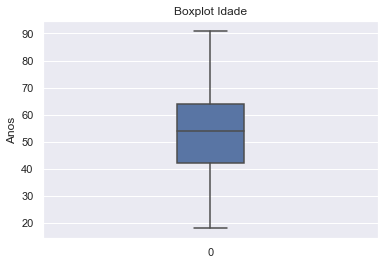

In [16]:
#Idade
fig = plt.figure()
sns.boxplot(data=idade, width=0.2)
plt.title('Boxplot Idade')
plt.ylabel('Anos')
fig.savefig('boxIdade.png', dpi=fig.dpi)

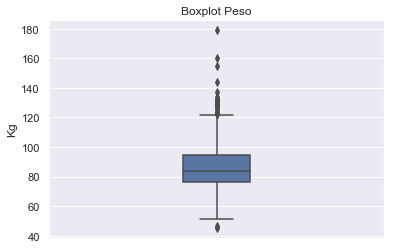

In [17]:
#Peso
fig = plt.figure()
sns.boxplot(peso, width=0.2, orient="v")
plt.title('Boxplot Peso')
plt.ylabel('Kg')
fig.savefig('boxPeso.png', dpi=fig.dpi)

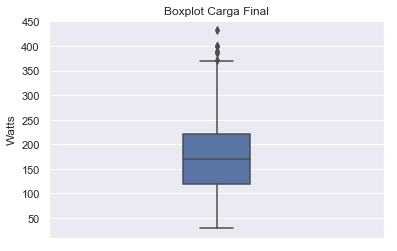

In [18]:
#Carga Final
fig = plt.figure()
sns.boxplot(cargafinal, width=0.2, orient="v")
plt.title('Boxplot Carga Final')
plt.ylabel('Watts')
fig.savefig('boxCF.png', dpi=fig.dpi)

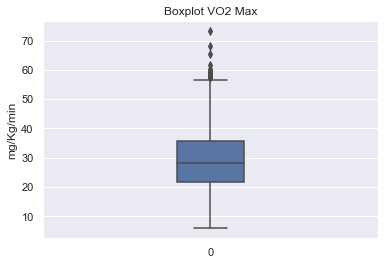

In [19]:
#VO2 Max
fig = plt.figure()
sns.boxplot(data=vo2max, width=0.2, orient="v")
plt.title('Boxplot VO2 Max')
plt.ylabel('mg/Kg/min')
fig.savefig('boxVO2.png', dpi=fig.dpi)

In [20]:
# Distribuições
def exponencial (x, l):
    return l*e**(-l*x)

def gaussiana (x, m, s):
    return 1/(s*sqrt(2*pi))*e**(-((x-m)**2)/(2*s**2))

def lognormal (x, m, s):
    return (e**(-(log(x)-m)**2/(2*s**2))/(x*s*sqrt(2*pi)))

def weibull (x, k, b):
    return b*k*(x**(k-1))*e**(-b*(x**k))

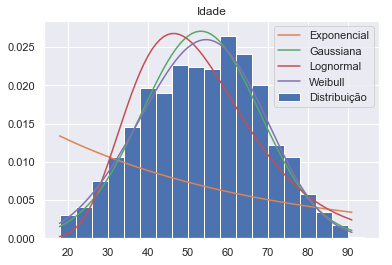

In [21]:
# Idade
# MLE para Distribuições
# Exponencial
l_exp = idade.size / np.sum(idade)

# Gaussiana
m = np.mean(idade)
s = np.std(idade)

# Lognormal
log_m = np.mean(list(map(log, idade)))
log_s = np.std(list(map(log, idade)))

# Weibull
k_idade = 4 #Shape
idade_sum = 0
for i in range(idade.size):
    idade_sum += idade[i]**k_idade
l_weib = idade.size / idade_sum

e_idade = list(exponencial(x, l_exp) for x in idade)
g_idade = list(gaussiana(x, m, s) for x in idade)
l_idade = list(lognormal(x, log_m, log_s) for x in idade)
w_idade = list(weibull(x, k_idade, l_weib) for x in idade)

fig = plt.figure()
b = tamanhoBin(idade.size, s)
plt.hist(idade, bins=range(int(min(idade)), int(max(idade)) + int(b), int(b)), label='Distribuição', density=True)
plt.plot(idade, e_idade, label='Exponencial')
plt.plot(idade, g_idade, label='Gaussiana')
plt.plot(idade, l_idade, label='Lognormal')
plt.plot(idade, w_idade, label='Weibull')
plt.title('Idade')
plt.legend(loc='best')
fig.savefig('distIdade.png', dpi=fig.dpi)

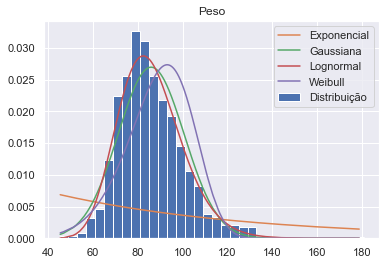

In [22]:
# Peso
# MLE para Distribuições
# Exponencial
l_exp = peso.size / np.sum(peso)

# Gaussiana
m = np.mean(peso)
s = np.std(peso)

# Lognormal
log_m = np.mean(list(map(log, peso)))
log_s = np.std(list(map(log, peso)))

# Weibull
k_peso = 7 #Shape
peso_sum = 0
for i in range(peso.size):
    peso_sum += peso[i]**k_peso
l_weib = peso.size / peso_sum

e_peso = list(exponencial(x, l_exp) for x in peso)
g_peso = list(gaussiana(x, m, s) for x in peso)
l_peso = list(lognormal(x, log_m, log_s) for x in peso)
w_peso = list(weibull(x, k_peso, l_weib) for x in peso)

fig = plt.figure()
b = tamanhoBin(peso.size, s)
plt.hist(peso, bins=range(int(min(peso)), int(max(peso)) + int(b), int(b)), label='Distribuição', density=True)
plt.plot(peso, e_peso, label='Exponencial')
plt.plot(peso, g_peso, label='Gaussiana')
plt.plot(peso, l_peso, label='Lognormal')
plt.plot(peso, w_peso, label='Weibull')
plt.title('Peso')
plt.legend(loc='best')
fig.savefig('distPeso.png', dpi=fig.dpi)

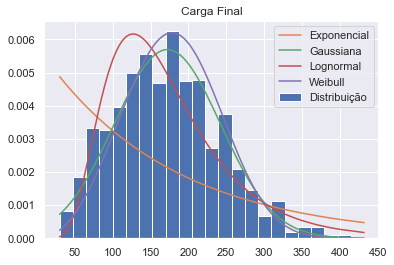

In [23]:
# Carga Final
# MLE para Distribuições
# Exponencial
l_exp = cargafinal.size / np.sum(cargafinal)

# Gaussiana
m = np.mean(cargafinal)
s = np.std(cargafinal)

# Lognormal
log_m = np.mean(list(map(log, cargafinal)))
log_s = np.std(list(map(log, cargafinal)))

# Weibull
k_cf = 3.2 #Shape
cargafinal_sum = 0
for i in range(cargafinal.size):
    cargafinal_sum += cargafinal[i]**k_cf
l_weib = cargafinal.size / cargafinal_sum

e_cf = list(exponencial(x, l_exp) for x in cargafinal)
g_cf = list(gaussiana(x, m, s) for x in cargafinal)
l_cf = list(lognormal(x, log_m, log_s) for x in cargafinal)
w_cf = list(weibull(x, k_cf, l_weib) for x in cargafinal)

fig = plt.figure()
b = tamanhoBin(cargafinal.size, s)
plt.hist(cargafinal, bins=int(b), label='Distribuição', density=True)
plt.plot(cargafinal, e_cf, label='Exponencial')
plt.plot(cargafinal, g_cf, label='Gaussiana')
plt.plot(cargafinal, l_cf, label='Lognormal')
plt.plot(cargafinal, w_cf, label='Weibull')
plt.title('Carga Final')
plt.legend(loc='best')
fig.savefig('distCF.png', dpi=fig.dpi)

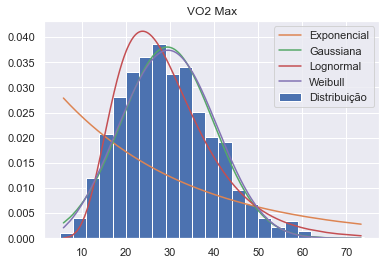

In [24]:
# VO2 Max
# MLE para Distribuições
# Exponencial
l_exp = vo2max.size / np.sum(vo2max)

# Gaussiana
m = np.mean(vo2max)
s = np.std(vo2max)

# Lognormal
log_m = np.mean(list(map(log, vo2max)))
log_s = np.std(list(map(log, vo2max)))

# Weibull
k_vo2 = 3.2 #Shape
vo2max_sum = 0
for i in range(vo2max.size):
    vo2max_sum += vo2max[i]**k_vo2
l_weib = vo2max.size / vo2max_sum

e_vo2 = list(exponencial(x, l_exp) for x in vo2max)
g_vo2 = list(gaussiana(x, m, s) for x in vo2max)
l_vo2 = list(lognormal(x, log_m, log_s) for x in vo2max)
w_vo2 = list(weibull(x, k_vo2, l_weib) for x in vo2max)

fig = plt.figure()
b = tamanhoBin(vo2max.size, s)
plt.hist(vo2max, bins=range(int(min(vo2max)), int(max(vo2max)) + int(b), int(b)), label='Distribuição', density=True)
plt.plot(vo2max, e_vo2, label='Exponencial')
plt.plot(vo2max, g_vo2, label='Gaussiana')
plt.plot(vo2max, l_vo2, label='Lognormal')
plt.plot(vo2max, w_vo2, label='Weibull')
plt.title('VO2 Max')
plt.legend(loc='best')
fig.savefig('distVO2.png', dpi=fig.dpi)

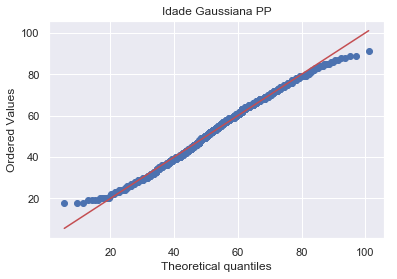

In [25]:
# Probability Plot
# Gaussiana
fig = plt.figure()
probplot(idade,dist=norm(loc=np.mean(idade),scale=np.std(idade)),plot=plt)
plt.title('Idade Gaussiana PP')
fig.savefig('ppIdadeGaus.png', dpi=fig.dpi)

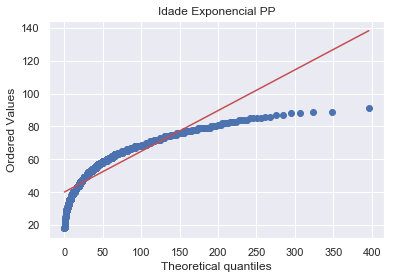

In [26]:
# Exponencial
fig = plt.figure()
l_exp = idade.size/np.sum(idade)
probplot(idade,dist=expon(scale=1./l_exp),plot=plt)
plt.title('Idade Exponencial PP')
fig.savefig('ppIdadeExp.png', dpi=fig.dpi)

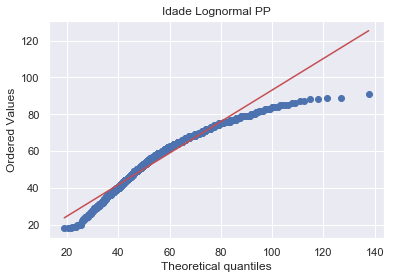

In [27]:
# Lognormal
fig = plt.figure()
log_m = np.mean(list(map(log, idade)))
log_s = np.std(list(map(log, idade)))
probplot(idade,dist=lognorm(s=log_s,scale=e**(log_m)),plot=plt)
plt.title('Idade Lognormal PP')
fig.savefig('ppIdadeLog.png', dpi=fig.dpi)

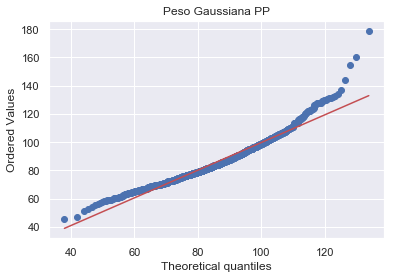

In [28]:
# Peso
# Gaussiana
fig = plt.figure()
probplot(peso,dist=norm(loc=np.mean(peso),scale=np.std(peso)),plot=plt)
plt.title('Peso Gaussiana PP')
fig.savefig('ppPesoGaus.png', dpi=fig.dpi)

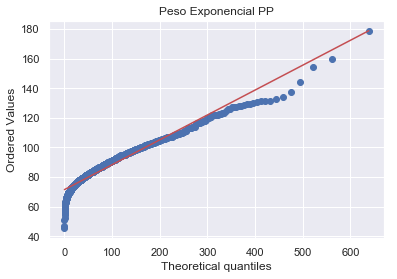

In [29]:
# Exponencial
fig = plt.figure()
l_exp = peso.size/np.sum(peso)
probplot(peso,dist=expon(scale=1./l_exp),plot=plt)
plt.title('Peso Exponencial PP')
fig.savefig('ppPesoExp.png', dpi=fig.dpi)

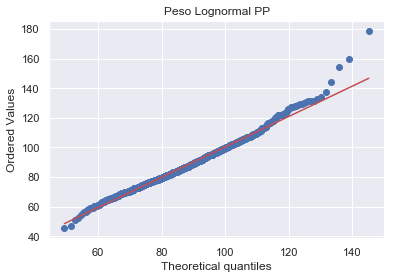

In [30]:
# Lognormal
fig = plt.figure()
log_m = np.mean(list(map(log, peso)))
log_s = np.std(list(map(log, peso)))
probplot(peso,dist=lognorm(s=log_s,scale=e**(log_m)),plot=plt)
plt.title('Peso Lognormal PP')
fig.savefig('ppPesoLog.png', dpi=fig.dpi)

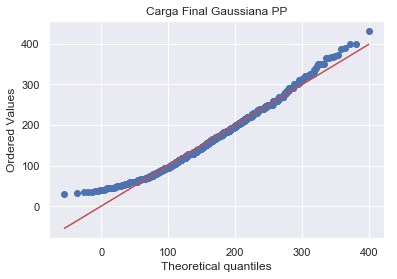

In [31]:
# Carga Final
# Gaussiana
fig = plt.figure()
probplot(cargafinal,dist=norm(loc=np.mean(cargafinal),scale=np.std(cargafinal)),plot=plt)
plt.title('Carga Final Gaussiana PP')
fig.savefig('ppCFGaus.png', dpi=fig.dpi)

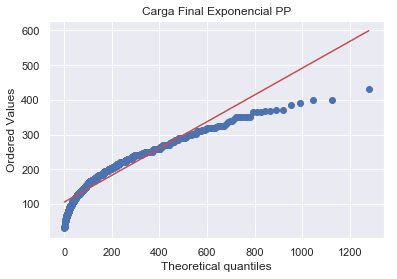

In [32]:
# Exponencial
fig = plt.figure()
l_exp = cargafinal.size/np.sum(cargafinal)
probplot(cargafinal,dist=expon(scale=1./l_exp),plot=plt)
plt.title('Carga Final Exponencial PP')
fig.savefig('ppCFExp.png', dpi=fig.dpi)

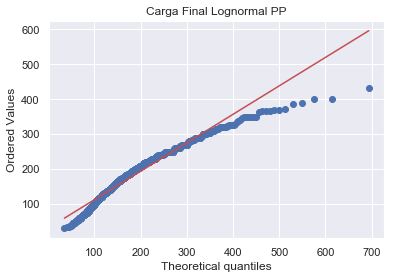

In [33]:
# Lognormal
fig = plt.figure()
log_m = np.mean(list(map(log, cargafinal)))
log_s = np.std(list(map(log, cargafinal)))
probplot(cargafinal,dist=lognorm(s=log_s,scale=e**(log_m)),plot=plt)
plt.title('Carga Final Lognormal PP')
fig.savefig('ppCFLog.png', dpi=fig.dpi)

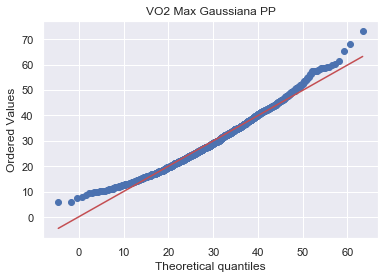

In [34]:
# VO2 Max
# Gaussiana
fig = plt.figure()
probplot(vo2max,dist=norm(loc=np.mean(vo2max),scale=np.std(vo2max)),plot=plt)
plt.title('VO2 Max Gaussiana PP')
fig.savefig('ppVO2Gaus.png', dpi=fig.dpi)

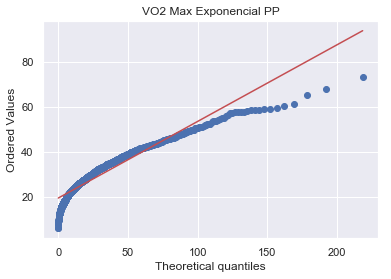

In [35]:
# Exponencial
fig = plt.figure()
l_exp = vo2max.size/np.sum(vo2max)
probplot(vo2max,dist=expon(scale=1./l_exp),plot=plt)
plt.title('VO2 Max Exponencial PP')
fig.savefig('ppVO2Exp.png', dpi=fig.dpi)

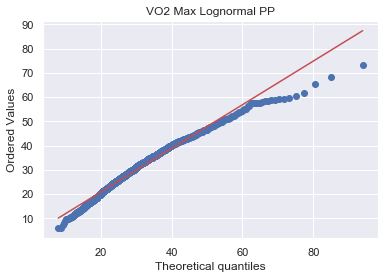

In [36]:
# Lognormal
fig = plt.figure()
log_m = np.mean(list(map(log, vo2max)))
log_s = np.std(list(map(log, vo2max)))
probplot(vo2max,dist=lognorm(s=log_s,scale=e**(log_m)),plot=plt)
plt.title('VO2 Max Lognormal PP')
fig.savefig('ppVO2Log.png', dpi=fig.dpi)

In [37]:
# Teste de Hipotese
# Komolgorov-Smirnov

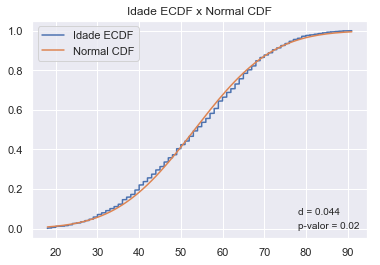

In [38]:
m = idade.mean()
s = idade.std()
y = np.arange(1, len(idade)+1)/len(idade)
y2 = list(norm(loc=m,scale=s).cdf(x) for x in idade)
idade = np.sort(idade)
fig = plt.figure()
plt.plot(idade, y, label="Idade ECDF")
plt.plot(idade, y2, label="Normal CDF")
plt.text(78,0.07, "d = 0.044")
plt.text(78,0, "p-valor = 0.02")
plt.title('Idade ECDF x Normal CDF')
plt.legend(loc='best')
fig.savefig('ksIdadeGaus.png', dpi=fig.dpi)

In [39]:
kstest(idade, norm(loc=m,scale=s).cdf)

KstestResult(statistic=0.04408368872194113, pvalue=0.02039175142101984)

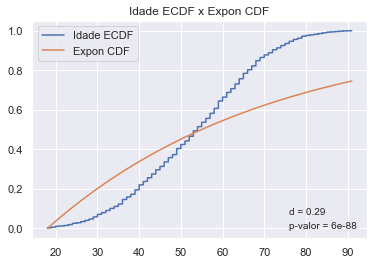

In [40]:
l_exp = idade.size/np.sum(idade)
y2 = list(expon(loc=min(idade),scale=1./l_exp).cdf(x) for x in idade)
fig = plt.figure()
plt.plot(idade, y, label="Idade ECDF")
plt.plot(idade, y2, label="Expon CDF")
plt.text(76,0.07, "d = 0.29")
plt.text(76,0, "p-valor = 6e-88")
plt.title('Idade ECDF x Expon CDF')
plt.legend(loc='best')
fig.savefig('ksIdadeExp.png', dpi=fig.dpi)

In [41]:
kstest(idade, expon(loc=min(idade),scale=1./l_exp).cdf)

KstestResult(statistic=0.29017528669873005, pvalue=6.842886853532945e-88)

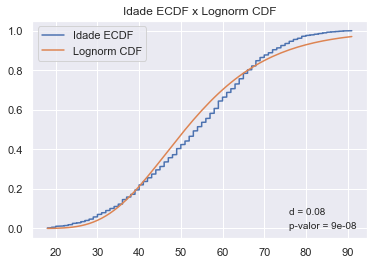

In [42]:
l_exp = idade.size/np.sum(idade)
log_m = np.mean(list(map(log, idade)))
log_s = np.std(list(map(log, idade)))
y2 = list(lognorm(s=log_s, scale=e**(log_m)).cdf(x) for x in idade)
fig = plt.figure()
plt.plot(idade, y, label="Idade ECDF")
plt.plot(idade, y2, label="Lognorm CDF")
plt.text(76,0.07, "d = 0.08")
plt.text(76,0, "p-valor = 9e-08")
plt.title('Idade ECDF x Lognorm CDF')
plt.legend(loc='best')
fig.savefig('ksIdadeLog.png', dpi=fig.dpi)

In [43]:
log_m = np.mean(list(map(log, idade)))
log_s = np.std(list(map(log, idade)))
kstest(idade, lognorm(s=log_s, scale=e**(log_m)).cdf)

KstestResult(statistic=0.08473046044762722, pvalue=9.073029891407911e-08)

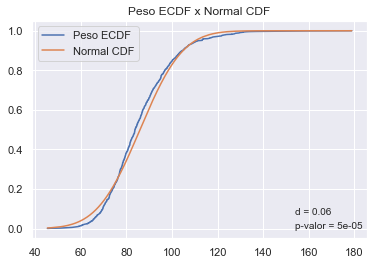

In [44]:
# Peso
m = peso.mean()
s = peso.std()
y = np.arange(1, len(peso)+1)/len(peso)
y2 = list(norm(loc=m,scale=s).cdf(x) for x in peso)
peso = np.sort(peso)
fig = plt.figure()
plt.plot(peso, y, label="Peso ECDF")
plt.plot(peso, y2, label="Normal CDF")
plt.text(154,0.07, "d = 0.06")
plt.text(154,0, "p-valor = 5e-05")
plt.title('Peso ECDF x Normal CDF')
plt.legend(loc='best')
fig.savefig('ksPesoGaus.png', dpi=fig.dpi)

In [45]:
kstest(peso, norm(loc=m,scale=s).cdf)

KstestResult(statistic=0.06661818817785059, pvalue=5.75842350736874e-05)

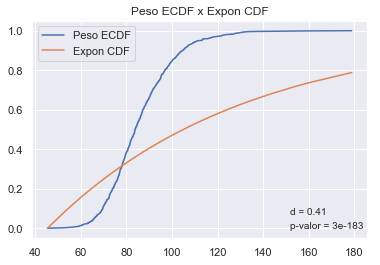

In [46]:
l_exp = peso.size/np.sum(peso)
y2 = list(expon(loc=min(peso),scale=1./l_exp).cdf(x) for x in peso)
fig = plt.figure()
plt.plot(peso, y, label="Peso ECDF")
plt.plot(peso, y2, label="Expon CDF")
plt.text(152,0.07, "d = 0.41")
plt.text(152,0, "p-valor = 3e-183")
plt.title('Peso ECDF x Expon CDF')
plt.legend(loc='best')
fig.savefig('ksPesoExp.png', dpi=fig.dpi)

In [47]:
kstest(peso, expon(loc=min(peso),scale=1./l_exp).cdf)

KstestResult(statistic=0.4149546030060167, pvalue=3.2919362133299685e-183)

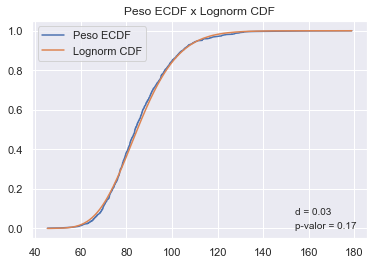

In [48]:
l_exp = peso.size/np.sum(peso)
log_m = np.mean(list(map(log, peso)))
log_s = np.std(list(map(log, peso)))
y2 = list(lognorm(s=log_s, scale=e**(log_m)).cdf(x) for x in peso)
fig = plt.figure()
plt.plot(peso, y, label="Peso ECDF")
plt.plot(peso, y2, label="Lognorm CDF")
plt.text(154,0.07, "d = 0.03")
plt.text(154,0, "p-valor = 0.17")
plt.title('Peso ECDF x Lognorm CDF')
plt.legend(loc='best')
fig.savefig('ksPesoLog.png', dpi=fig.dpi)

In [49]:
log_m = np.mean(list(map(log, peso)))
log_s = np.std(list(map(log, peso)))
kstest(peso, lognorm(s=log_s, scale=e**(log_m)).cdf)

KstestResult(statistic=0.03228525900266399, pvalue=0.17003957723536414)

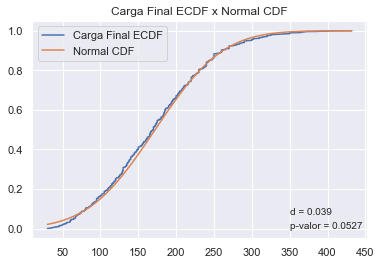

In [50]:
# Carga Final
m = cargafinal.mean()
s = cargafinal.std()
y = np.arange(1, len(cargafinal)+1)/len(cargafinal)
y2 = list(norm(loc=m,scale=s).cdf(x) for x in cargafinal)
cargafinal = np.sort(cargafinal)
fig = plt.figure()
plt.plot(cargafinal, y, label="Carga Final ECDF")
plt.plot(cargafinal, y2, label="Normal CDF")
plt.text(350,0.07, "d = 0.039")
plt.text(350,0, "p-valor = 0.0527")
plt.title('Carga Final ECDF x Normal CDF')
plt.legend(loc='best')
fig.savefig('ksCFGaus.png', dpi=fig.dpi)

In [51]:
kstest(cargafinal, norm(loc=m,scale=s).cdf)

KstestResult(statistic=0.039233911356943985, pvalue=0.05277656069132966)

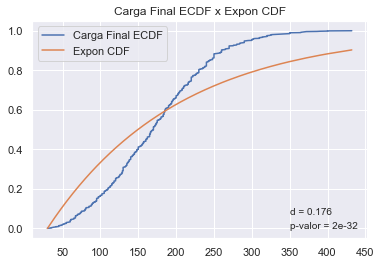

In [52]:
l_exp = cargafinal.size/np.sum(cargafinal)
y2 = list(expon(loc=min(cargafinal), scale=1./l_exp).cdf(x) for x in cargafinal)
fig = plt.figure()
plt.plot(cargafinal, y, label="Carga Final ECDF")
plt.plot(cargafinal, y2, label="Expon CDF")
plt.text(350,0.07, "d = 0.176")
plt.text(350,0, "p-valor = 2e-32")
plt.title('Carga Final ECDF x Expon CDF')
plt.legend(loc='best')
fig.savefig('ksCFExp.png', dpi=fig.dpi)

In [53]:
l_exp = cargafinal.size/np.sum(cargafinal)
kstest(cargafinal, expon(loc=min(cargafinal), scale=1./l_exp).cdf)

KstestResult(statistic=0.1763466914568678, pvalue=2.3746911723494975e-32)

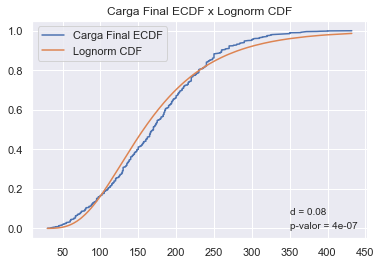

In [54]:
l_exp = cargafinal.size/np.sum(cargafinal)
log_m = np.mean(list(map(log, cargafinal)))
log_s = np.std(list(map(log, cargafinal)))
y2 = list(lognorm(s=log_s, scale=e**(log_m)).cdf(x) for x in cargafinal)
fig = plt.figure()
plt.plot(cargafinal, y, label="Carga Final ECDF")
plt.plot(cargafinal, y2, label="Lognorm CDF")
plt.text(350,0.07, "d = 0.08")
plt.text(350,0, "p-valor = 4e-07")
plt.title('Carga Final ECDF x Lognorm CDF')
plt.legend(loc='best')
fig.savefig('ksCFLog.png', dpi=fig.dpi)

In [55]:
log_m = np.mean(list(map(log, cargafinal)))
log_s = np.std(list(map(log, cargafinal)))
kstest(cargafinal, lognorm(s=log_s, scale=e**(log_m)).cdf)

KstestResult(statistic=0.08035970386976432, pvalue=4.962162909725836e-07)

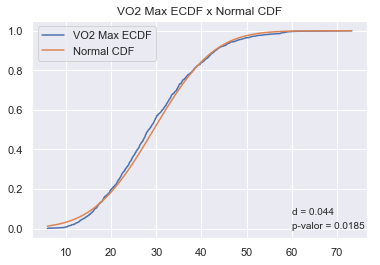

In [56]:
# VO2 Max
m = vo2max.mean()
s = vo2max.std()
y = np.arange(1, len(vo2max)+1)/len(vo2max)
y2 = list(norm(loc=m,scale=s).cdf(x) for x in vo2max)
vo2max = np.sort(vo2max)
fig = plt.figure()
plt.plot(vo2max, y, label="VO2 Max ECDF")
plt.plot(vo2max, y2, label="Normal CDF")
plt.text(60,0.07, "d = 0.044")
plt.text(60,0, "p-valor = 0.0185")
plt.title('VO2 Max ECDF x Normal CDF')
plt.legend(loc='best')
fig.savefig('ksVO2Gaus.png', dpi=fig.dpi)

In [57]:
kstest(vo2max, norm(loc=m,scale=s).cdf)

KstestResult(statistic=0.04453184985102793, pvalue=0.018572422090605736)

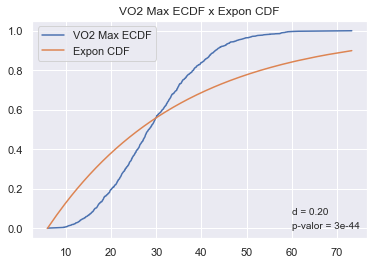

In [58]:
l_exp = vo2max.size/np.sum(vo2max)
y2 = list(expon(loc=min(vo2max),scale=1./l_exp).cdf(x) for x in vo2max)
fig = plt.figure()
plt.plot(vo2max, y, label="VO2 Max ECDF")
plt.plot(vo2max, y2, label="Expon CDF")
plt.text(60,0.07, "d = 0.20")
plt.text(60,0, "p-valor = 3e-44")
plt.title('VO2 Max ECDF x Expon CDF')
plt.legend(loc='best')
fig.savefig('ksVO2Exp.png', dpi=fig.dpi)

In [59]:
kstest(vo2max, expon(loc=min(vo2max),scale=1./l_exp).cdf)

KstestResult(statistic=0.2063270427561419, pvalue=3.1103731374918206e-44)

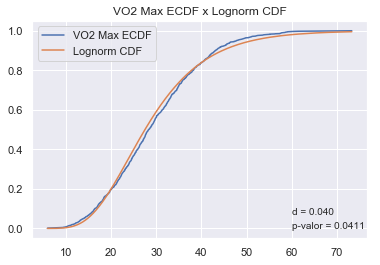

In [60]:
l_exp = vo2max.size/np.sum(vo2max)
log_m = np.mean(list(map(log, vo2max)))
log_s = np.std(list(map(log, vo2max)))
y2 = list(lognorm(s=log_s, scale=e**(log_m)).cdf(x) for x in vo2max)
fig = plt.figure()
plt.plot(vo2max, y, label="VO2 Max ECDF")
plt.plot(vo2max, y2, label="Lognorm CDF")
plt.text(60,0.07, "d = 0.040")
plt.text(60,0, "p-valor = 0.0411")
plt.title('VO2 Max ECDF x Lognorm CDF')
plt.legend(loc='best')
fig.savefig('ksVO2Log.png', dpi=fig.dpi)

In [61]:
log_m = np.mean(list(map(log, vo2max)))
log_s = np.std(list(map(log, vo2max)))
kstest(vo2max, lognorm(s=log_s, scale=e**(log_m)).cdf)

KstestResult(statistic=0.04056142112151179, pvalue=0.0411306814500259)

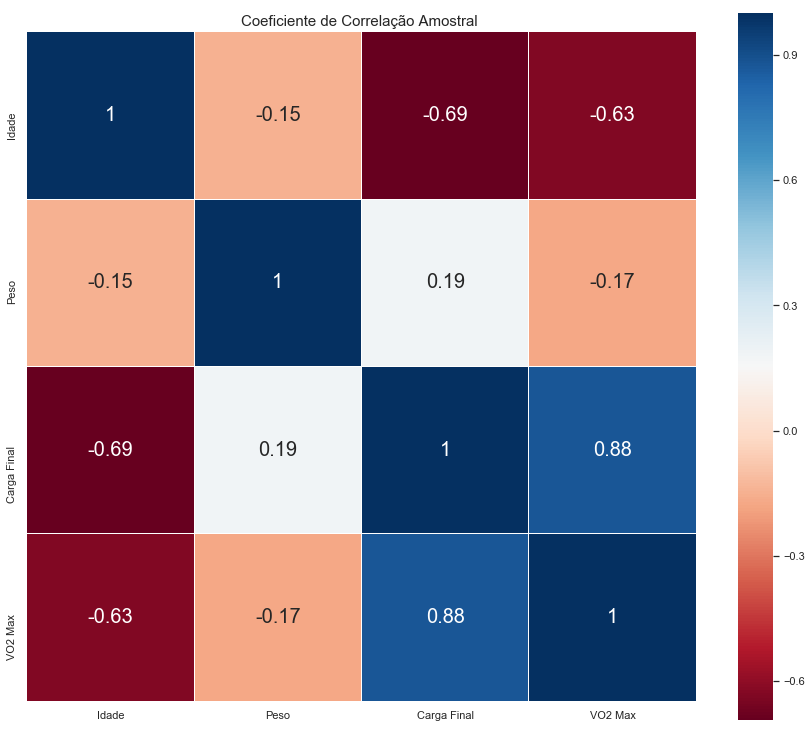

In [70]:
colormap = plt.cm.RdBu
fig = plt.figure(figsize=(15,13))
plt.title('Coeficiente de Correlação Amostral ', y=1, size=15)
sns.heatmap(data_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 20})
fig.savefig('corr.png', dpi=fig.dpi)

In [63]:
# Inferência Bayesiana
# Maior Coeficiente de Correlação = Carga Final x VO2 Max (0.88)
# Hipóteses: Valores de Carga Final
# Prior: pmf da Carga Final
# Likelihood: P[VO2Max | Faixa de Carga Final]
# Faixas de VO2 Max: VO2Max < 35 & VO2Max >= 35

In [64]:
# Prior
y = np.arange(1, len(peso)+1)/len(peso)